In [35]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import os
import sys
import json


In [36]:
notebook_dir = Path(os.path.abspath('')).resolve()
sys.path.append(notebook_dir.as_posix())

from nugget_util.python_processing.analysis_functions import (
    get_static_info,
)

In [37]:
def get_diff(df1, df2):
    # Make sure both DataFrames have the same columns
    common_columns = df1.columns.intersection(df2.columns)
    df1 = df1[common_columns]
    df2 = df2[common_columns]

    # Reset indices to make sure they match
    df1 = df1.reset_index(drop=True)
    df2 = df2.reset_index(drop=True)

    # Now compare the DataFrames
    diff = df1.compare(df2)
    return diff

def get_the_function_name_of_bb(bb, bb_info):
    if(int(bb) in bb_info.keys()):
        return bb_info[int(bb)]['function_name']
    else:
        return "Unknown"
    
def get_data_out_of_json(json_file):
    with open(json_file) as f:
        data = json.load(f)
    return data["threads"]["0"]["regions"]["0"]

def plot_data_points(data_points, x_axis_name, title, y_label, x_label, save_path):
    fig, ax = plt.subplots()
    x_axis = np.arange(0, len(data_points))
    ax.plot(x_axis, data_points)
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_xticklabels(x_axis_name)
    fig.savefig(save_path)
    plt.show()

def reversed_dict(d):
    return {v: k for k, v in d.items()}

def get_cid(rid, rep_info):
    reversed_rep_info = reversed_dict(rep_info)
    return reversed_rep_info[rid]['cid']

def get_rep_rid(cid, rep_info):
    return rep_info[cid]
    


In [38]:
saphir_df_file_path = Path("/home/studyztp/test_ground/experiments/lsms/nugget-protocol-lsms/experiments/info/ir-bb-analysis/comparison/saphir-df.csv")
saphir_df = pd.read_csv(saphir_df_file_path, dtype={"region": str, "type": str})

summer_df_file_path = Path("/home/studyztp/test_ground/experiments/lsms/nugget-protocol-lsms/experiments/info/ir-bb-analysis/comparison/summer-df.csv")
summer_df = pd.read_csv(summer_df_file_path, dtype={"region": str, "type": str})

saphir_marker_file_path = Path("/home/studyztp/test_ground/experiments/lsms/nugget-protocol-lsms/experiments/info/ir-bb-analysis/comparison/saphir-marker.csv")
saphir_marker = pd.read_csv(saphir_marker_file_path, dtype={"region": str})

summer_marker_file_path = Path("/home/studyztp/test_ground/experiments/lsms/nugget-protocol-lsms/experiments/info/ir-bb-analysis/comparison/summer-marker.csv")
summer_marker = pd.read_csv(summer_marker_file_path, dtype={"region": str})

saphir_select_rids_path = Path("/home/studyztp/test_ground/experiments/lsms/nugget-protocol-lsms/experiments/info/ir-bb-analysis/comparison/saphir-k-means-selection/selected-regions.txt")
with open(saphir_select_rids_path, "r") as f:
    saphir_selected_rids = f.read()
saphir_selected_rids = saphir_selected_rids.split()

basic_block_info_file_path = Path("/home/studyztp/test_ground/experiments/lsms/nugget-protocol-lsms/experiments/info/ir-bb-analysis/comparison/saphir-basic-block-info.txt")
basic_block_info = get_static_info(basic_block_info_file_path)

saphir_nugget_run_dir = Path("/home/studyztp/test_ground/experiments/lsms/nugget-protocol-lsms/experiments/saphir-papi-nuggets/saphir-experiment")

saphir_k_means_json_file = Path("/home/studyztp/test_ground/experiments/lsms/nugget-protocol-lsms/experiments/info/ir-bb-analysis/comparison/saphir-k-means-selection/kmeans-result.json")
with open(saphir_k_means_json_file, "r") as f:
    saphir_k_means_data = json.load(f)

In [39]:
marker_diff = get_diff(saphir_marker, summer_marker)
marker_diff.to_csv("marker_diff.csv")

In [40]:
print(saphir_marker[saphir_marker['region'] == "14"])

   region  warmup_rid  start_rid  warmup_bid  warmup_count  start_bid  \
14     14          12         13       12233            51      12250   

    start_count  end_bid  end_count  
14        11610    12230      11871  


In [41]:
print(get_the_function_name_of_bb(12230, basic_block_info))

rwave_


In [42]:
result = {}
all_rids = []

for dir in saphir_nugget_run_dir.iterdir():
    if not dir.is_dir():
        continue
    rid = dir.name
    all_rids.append(int(rid))
    json_file = Path(dir/"run0/papi_hl_output/rank_000000.json")
    data = get_data_out_of_json(json_file)
    result[rid] = data

with open("saphir-result.json", "w") as f:
    json.dump(result, f, indent=4)

/tmp/ipykernel_758397/1873390535.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_axis_name)


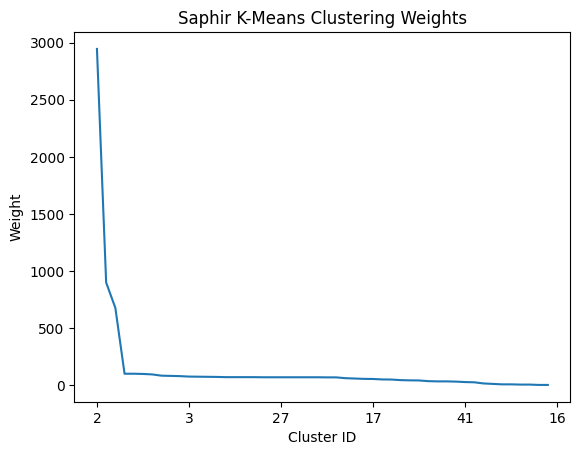

/tmp/ipykernel_758397/1873390535.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_axis_name)


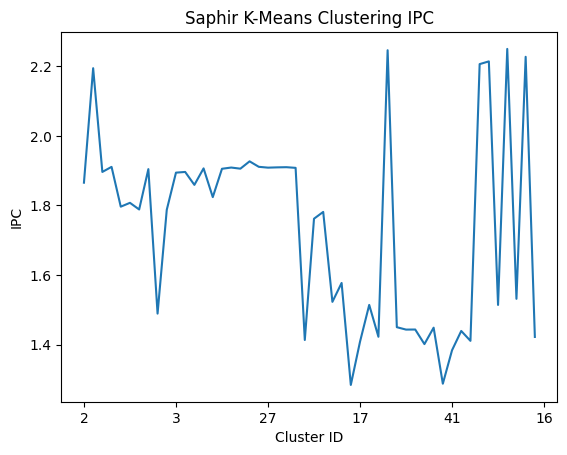

/tmp/ipykernel_758397/1873390535.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_axis_name)


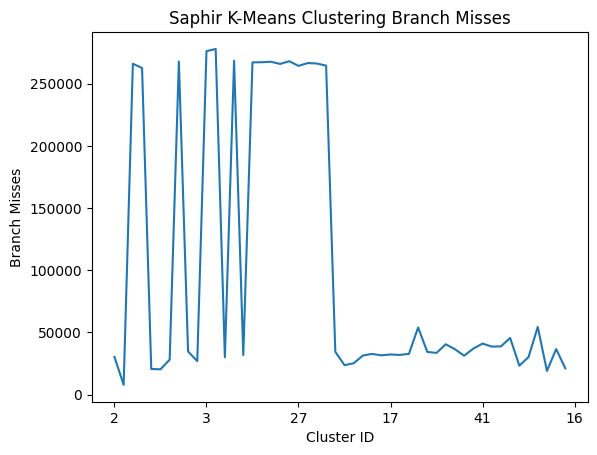

/tmp/ipykernel_758397/1873390535.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_axis_name)


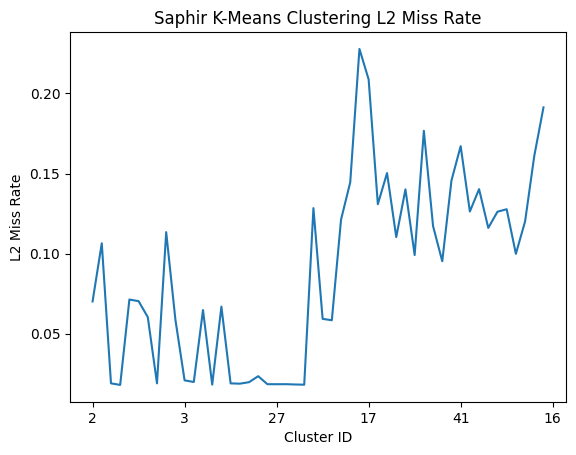

In [43]:
weight_dict = saphir_k_means_data["clusters_weights"]
rep_rid_list = saphir_k_means_data["rep_rid"]
all_cids = rep_rid_list.keys()

weight_list = [weight_dict[str(cid)] for cid in all_cids]

# Sort both lists together based on weights (descending order)
sorted_weights, sorted_cids = zip(*sorted(zip(weight_list, all_cids), reverse=True))

# Convert back to lists if needed (zip returns tuples)
weight_list = list(sorted_weights)
all_regions = sum(weight_list)
all_cids = list(sorted_cids)
all_rids = [int(get_rep_rid(cid, rep_rid_list)) for cid in all_cids]

plot_data_points(weight_list, all_cids, "Saphir K-Means Clustering Weights", "Weight", "Cluster ID", "saphir-k-means-clustering-weights.png")

# get ipc 
ipc_list = [float(result[str(rid)]["PAPI_TOT_INS"])/float(result[str(rid)]["PAPI_TOT_CYC"]) for rid in all_rids]
plot_data_points(ipc_list, all_cids, "Saphir K-Means Clustering IPC", "IPC", "Cluster ID", "saphir-k-means-clustering-ipc.png")
predicted_ipc = sum([(ipc*weight)/all_regions for ipc, weight in zip(ipc_list, weight_list)])


branch_misses_list = [float(result[str(rid)]["PAPI_BR_MSP"]) for rid in all_rids]
plot_data_points(branch_misses_list, all_cids, "Saphir K-Means Clustering Branch Misses", "Branch Misses", "Cluster ID", "saphir-k-means-clustering-branch-misses.png")
predicted_branch_misses = sum([(branch_misses*weight) for branch_misses, weight in zip(branch_misses_list, weight_list)])

l2_miss_rate_list = [float(result[str(rid)]["PAPI_L2_DCM"])/float(result[str(rid)]["PAPI_L2_DCR"]) for rid in all_rids]
plot_data_points(l2_miss_rate_list, all_cids, "Saphir K-Means Clustering L2 Miss Rate", "L2 Miss Rate", "Cluster ID", "saphir-k-means-clustering-l2-miss-rate.png")
predicted_l2_miss_rate = sum([(l2_miss_rate*weight)/all_regions for l2_miss_rate, weight in zip(l2_miss_rate_list, weight_list)])


In [ ]:

print("ipc diff")
actual_ipc =28484292222799/14899517699080
print(actual_ipc)
print(predicted_ipc)
print((predicted_ipc-actual_ipc)/actual_ipc)

print("branch misses diff")
actual_branch_misses = 618228492
print(actual_branch_misses)
print(predicted_branch_misses)
print((predicted_branch_misses-actual_branch_misses)/actual_branch_misses)

print("l2 miss rate diff")
actual_l2_data_miss_rate = 13706080157/694915294556
print(actual_l2_data_miss_rate)
print(predicted_l2_miss_rate)
print((predicted_l2_miss_rate-actual_l2_data_miss_rate)/actual_l2_data_miss_rate)



ipc diff
1.9117593467174994
1.8650259148929937
-0.02444524824986323
branch misses diff
618228492
613234540.0
-0.008077841873389426
l2 miss rate diff
0.01972338249621802
0.07078554304707627
2.588914987611758
